In [3]:
#Importing the libraries. 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

%matplotlib inline 

In [4]:
movies = pd.read_csv('movies.csv')

movies

,index,movie_name,year_of_release,category,run_time_in_mins,genre,genre_2,genre_3,imdb_rating,votes,gross_total_in_millions
0,1,The Godfather,1972,R,175,Crime,Drama,NaN,9.2,"1,860,471",134.97
1,2,The Silence of the Lambs,1991,R,118,Crime,Drama,Thriller,8.6,"1,435,344",130.74
2,3,Star Wars: Episode V - The Empire Strikes Back,1980,PG,124,Action,Adventure,Fantasy,8.7,"1,294,805",290.48
3,4,The Shawshank Redemption,1994,R,142,Drama,NaN,NaN,9.3,"2,683,302",28.34
4,5,The Shining,1980,R,146,Drama,Horror,NaN,8.4,"1,025,560",44.02
...,...,...,...,...,...,...,...,...,...,...,...
94,95,The Usual Suspects,1995,R,106,Crime,Drama,Mystery,8.5,"1,087,832",23.34
95,96,Cool Hand Luke,1967,GP,127,Crime,Drama,NaN,8.1,"178,888",16.22
96,97,Eternal Sunshine of the Spotless Mind,2004,R,108,Drama,Romance,Sci-Fi,8.3,"1,011,004",34.40
97,98,City Lights,1931,G,87,Comedy,Drama,Romance,8.5,"186,059",0.02


In [5]:
movies.describe()

,index,year_of_release,run_time_in_mins,imdb_rating,gross_total_in_millions
count,99.000000,99.000000,99.000000,99.000000,99.000000
mean,50.000000,1988.636364,133.626263,8.348485,116.293535
std,28.722813,20.326646,27.777757,0.368772,140.454252
min,1.000000,1931.000000,87.000000,7.200000,0.020000
25%,25.500000,1979.000000,115.500000,8.100000,26.900000
50%,50.000000,1995.000000,130.000000,8.300000,67.440000
75%,74.500000,2003.000000,147.500000,8.600000,158.435000
max,99.000000,2015.000000,238.000000,9.300000,936.660000


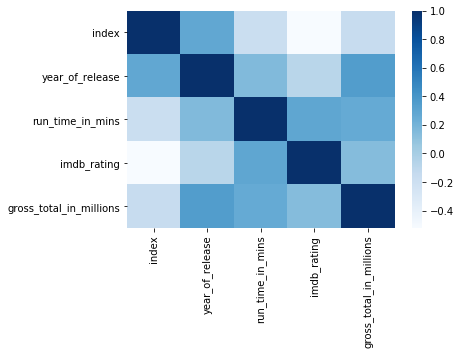

In [6]:
#Creating a heat map to show the correlation between each variables within the dataset.

sns.heatmap(movies.corr(), cmap = 'Blues')

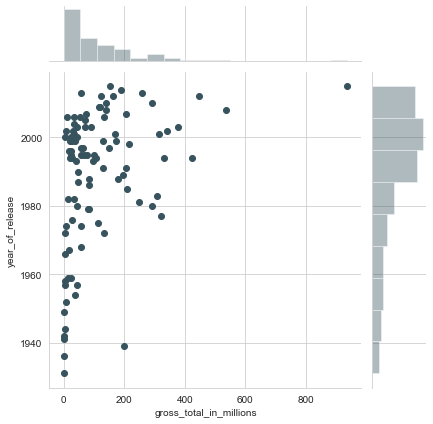

In [7]:
#Creating a joint plot to show the relationship between gross and year of release. Checking to see if there is a correlation between the two variables.

sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

sns.jointplot(x='gross_total_in_millions', y='year_of_release', data = movies)

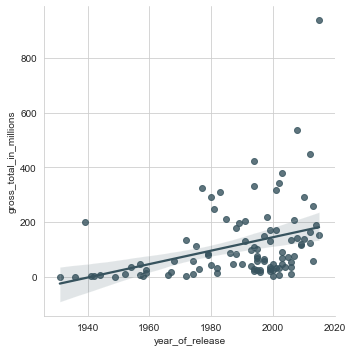

In [8]:
#Creating a linear model plot to represent the relationship between two variables

sns.lmplot(x='year_of_release', y='gross_total_in_millions', data = movies)

In [9]:
#Training the linear regression model based on the variables that we are hypothesizing will relate to total gross. 

y = movies['gross_total_in_millions']

X = movies['year_of_release']

In [10]:
#Using a model selection in order to to split the data into training and testing sets.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [11]:
#Training the model for linear regression. 

lm = LinearRegression()

In [12]:
#Train/fit lm onto the training data. 

lm.fit(X_train.values.reshape(-1,1), y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

<function matplotlib.pyplot.show(*args, **kw)>

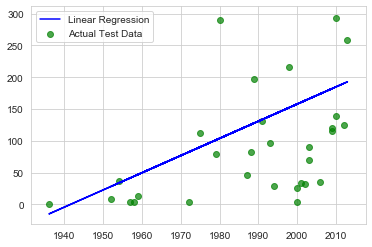

In [13]:
#Using model to predict on test data 

prediction = lm.predict(X_test.values.reshape(-1,1))

#Plot prediction line against actual test data 

plt.plot(X_test, prediction, label = 'Linear Regression', color ='b')
plt.scatter(X_test, y_test, label = 'Actual Test Data', color = 'g', alpha = 0.7)
plt.legend()

plt.show

In [14]:
#Predict gross total for movie year of release 1990 

lm.predict(np.array([[1990]]))[0]

130.77144254208906